In [1]:
import pytesseract
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
pytesseract.image_to_string(Image.open('../raw_data/label_composition_images/IMG_1385.JPG'))


'  \n \n\no4-31-3F0288\n315-07912034-04 u\nRN139864 1004- 7-208\n\nMADE IN CHINA |\n\nSHELL/ 190%\n\nFILLING/ 90%\n10%\n\nLINING/ 100%\n\n \n\x0c'

In [3]:
#"4 | .’\n\n| } \\\n\n. P a : . e ‘\naA : : a 4\n\n4 e ‘ Be ] oe\na. ‘> 2 i af J j\nBes ASL Pe. Be % £.y €.& £45. i\n_ ie! > wes = ’ : _— yy ; ” rf _ _\n% 4 he F Fe Rd Df I F VTE\na ah oy oo a e b, Ad b Wy a ell b ~~\n\n \n\n51%COTTON 49%POLESTER\n\n \n\nADOBE\nMADE IN CHINA\nRN129860 CA00108\nMACHINE WASH COLD SEPARATELY\nDO NOT BLEACH\nDRIP DRY IN SHADE\nDO NOT TUMBLE DRY\nWARM IRON ONLY\nDO NOT DRY CLEAN ,\nLaver a la machine a l'eau frotde\nseparement\nNe pas javelliser\nEtendre Mouille ,\nNe pas sécher a la machine\nRepasser au fer chaud seulement\n_ Pas de nettoyane a sec\n\x0c"
#for not preprocessed IMG_1382.JPG

#'  \n \n\no4-31-3F0288\n315-07912034-04 u\nRN139864 1004- 7-208\n\nMADE IN CHINA |\n\nSHELL/ 190%\n\nFILLING/ 90%\n10%\n\nLINING/ 100%\n\n \n\x0c'
# for not preprocessed IMG_1385.JPG

In [4]:
result = pytesseract.image_to_string(Image.open('../raw_data/label_composition_images/IMG_1378.JPG'))


In [5]:

#images = (Image.open('../raw_data/label_composition_images/'))

In [6]:
def preprocessing_image(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = cv2.medianBlur(grayscale,5)
    #threshold = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #threshold doesn't really work
    
    #dilation
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(noise, kernel, iterations = 1)

    #erosion

    kernel = np.ones((5,5),np.uint8)
    erode= cv2.erode(dilate, kernel, iterations = 1)

#opening - erosion followed by dilation
    #def opening(image):
    #kernel = np.ones((5,5),np.uint8)
    #return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
    
    #canny = cv2.Canny(threshold, 100, 200)

#skew correction
#def deskew(image):
    coords = np.column_stack(np.where(erode > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = erode.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskew = cv2.warpAffine(erode, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    

#template matching
#def match_template(image, template):
    #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

#def sharp(image):
    #sharp= cv2.bilateralFilter(deskew,9,75,75)
    return deskew
    

In [7]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder="../raw_data/label_composition_images"

In [8]:
labels = load_images_from_folder(folder)


NEW IMAGE
ATCT LILI LELLEL ILL UL

 

51% COTTON 49%POLYESIE!

xe AB aS
MADE IN CHINA

RN129860 CA00108

MACHINE WASH COLD SEPARATELY

00 NOT BLEACH

DRIP DRY IN SHADE

DO NOT TUMBLE DRY

WARM IRON ONLY

DONOTORY CLEAN

Laver a la machine a l'eau frowle

separement

Ne pas javelliser

Etendre Mouille

Ne pas secher a la machine

Repasser au fer chaud seulement

Pas de nettoyage a Spc

AxesImage(54,36;334.8x217.44)
NEW IMAGE
 

NPpaloae/ iA

{ed NIOLEW FTIONWIEG NOLOD/OVdONT

kk”

470d / NYHLFYIIA TOd / OURIeIMOT / ONY LAINITO
M38 9NZYAEN / LNIWILIATY / OLNIAWILSANFIA/ OL

d/ ANVHLAYNAATOd @OOt

NAINIHMANDANY / ONILVWOY
YRULISHIOd YFILSA1Od / 421SAYOd / yA Ss

De ILS 30a, °

SI19T/ ONIAFOA / ALANA / Fairy T9NOA?/ oxy, i 6475 NINTI
: LONZSIA / ISONSIA / &SO

SIL ZSIF/ I ay =

YIZ W704 AASHTO / 1a1SayOd / =

——

 

EM

oro BAN indy 2

AxesImage(54,36;334.8x217.44)
NEW IMAGE
    
    
  
   
  
 

   

qu, viscosa / viscose / BIEKOZH/ L—3» / viskose / viskoza / ¥&$ /
60% HI|A FA / 5959 /

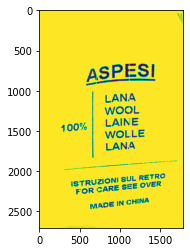

In [9]:
for label in labels:
    print("NEW IMAGE")
    image = preprocessing_image(label)
    print(pytesseract.image_to_string((image)))
    print(plt.imshow(image))

In [10]:
import cv2
import glob

imdir = '../raw_data/label_composition_images/'
ext = ['png', 'JPG', 'gif']    # Add image formats here
files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

In [11]:
images

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [216, 216, 216],
         [214, 214, 214],
         [236, 236, 236]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [223, 223, 223],
         [226, 226, 226],
         [246, 246, 246]],
 
        [[252, 252, 252],
         [252, 252, 252],
         [253, 253, 253],
         ...,
         [232, 232, 232],
         [234, 234, 234],
         [252, 252, 252]],
 
        ...,
 
        [[144, 217, 249],
         [141, 214, 246],
         [138, 209, 243],
         ...,
         [112, 113, 117],
         [115, 114, 118],
         [186, 185, 189]],
 
        [[134, 211, 244],
         [134, 208, 242],
         [134, 205, 242],
         ...,
         [ 98,  97,  99],
         [ 94,  91,  93],
         [175, 172, 174]],
 
        [[129, 208, 241],
         [130, 207, 240],
         [130, 204, 240],
         ...,
         [ 84,  83,  85],
  

In [12]:
for image in images:
    img = Image.fromarray(image, 'RGB')
    print("new_image")
    print(pytesseract.image_to_string((img)))

    #img.save('my.png')
    #img.show()

new_image
' | i) ,
‘ gy

}, 4 ? H : ”

' er & iy

\ . ‘ ; y Bs Fi
’ ° > he + . ay J t ' 5 { j
i : 4 . mali) i i 5 Rs * A “ 1 _- £ys .
is F nN a a ‘ _ q bd 1 | 2 iz y po =
MELLEL IV ELL EEE ZED) JT

 

51%COTTON 49%POLESTER

 

 

ADOBE
MADE IN CHINA
RN129860 CA00108
MACHINE WASH COLD SEPARATELY
DO NOT BLEACH
DRIP DRY IN SHADE
DO NOT TUMBLE DRY
WARM IRON ONLY
DO NOT DRY CLEAN ,
Laver a la machine a l'eau frovde
separement
Ne pas javelliser
Etendre Mouille
Ne pas sécher a la machine
Repasser au fer chaud seulement
_ Pas de nettoyane a sec

new_image
Pw
wd

mod / ONVLAY

NYLIMNITOd / NYVHLIYNA 10d / NVHLIANA TOd / OUPIAS m10a/7 d 2%OOT

NoAgsa/ 9NzZYIEN / LNINFLINIA / OLNAWILSANATA / OLN I on MA a oe an ILwOD
YFLZSH 10d / AALS AITOd / 4AISPIOA / YALS 3

110d / y41SHA10d %OOT

N19NCAGs ONHOSA / ONINIA
ZO.

7 / UOpobye /
OMNZSIA / ISOMSIA / & NOGOS1v/NOLLOD we
— FUZSH TOA / 4FILSFTOg / eed Vv D>

SODSIAN / ASODSIA HT
J AALSAAOKA J 2UAS1 STA IOS COoGoese

  

 

9509

ren REMMI | indy Y2"



In [13]:
custom_config = r'-l eng --psm 6'
print(pytesseract.image_to_string('../raw_data/label_composition_images/IMG_1378.jpg'))
    


  

GB: Sheil fabrict:100% polyester
racycled

Lining: 100% polyester recycled
Padding: 100% recycled content
NL: Bovenstoft: 100% polyester
gerecyciede

Voering: 100% palyaster aaracyelade
Vlling: 100% geracycieds inhoud

DE: Oberstofft: 100% Polyester recvestt
Futter: 100% Polyester recycelt
Wattierung: 100% recycelt Inhalt

FR: Etoffe extérieuret: 100%

polyester recycle
Doublura: 100% polyester recycle
Remplissaga: 100% recycle content

 



In [14]:
img = cv2.imread('../raw_data/label_composition_images/IMG_1385.JPG')

In [15]:
# Preprocessing the image

import cv2
import numpy as np



# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -1.000
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

def sharp(image):
    return cv2.bilateralFilter(image,9,75,75)
 

In [16]:

from scipy.ndimage import interpolation as inter

def findScore(img, angle):
    #"""
    #Generates a score for the binary image recieved dependent on the determined angle.\n
    #Vars:\n
    #- array <- numpy array of the label\n
    #- angle <- predicted angle at which the image is rotated by\n
    #Returns:\n
    #- histogram of the image
    #- score of potential angle
    #"""
    data = inter.rotate(img, angle, reshape = False, order = 0)
    hist = np.sum(data, axis = 1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

def skewCorrect(img):
    #"""
    #Takes in a nparray and determines the skew angle of the text, then corrects the skew and returns the corrected image.\n
    #Vars:\n
    #- img <- numpy array of the label\n
    #Returns:\n
    #- Corrected image as a numpy array\n
    #"""
    #Crops down the skewImg to determine the skew angle
    img = cv2.resize(img, (0, 0), fx = 0.75, fy = 0.75)
    delta = 1
    limit = 45
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = findScore(img, angle)
        scores.append(score)
    bestScore = max(scores)
    bestAngle = angles[scores.index(bestScore)]
    rotated = inter.rotate(img, bestAngle, reshape = False, order = 0)
    #print("[INFO] angle: {:.3f}".format(bestAngle))
    #cv2.imshow("Original", img)
    #cv2.imshow("Rotated", rotated)
    #cv2.waitKey(0)
    #Return img
    return rotated


In [17]:
img = cv2.imread('../raw_data/label_composition_images/IMG_1385.JPG')

In [18]:
#grayscale = get_grayscale(img)
#noise = remove_noise(grayscale)
#sharp = sharp(noise)
#thresholding = thresholding(sharp)
#dilatation = dilate(noise)
#erode = erode(thresholding)
#opening = opening(erode)
#canny = canny(opening)

#match = match_template(deskew, template)





In [19]:
#deskew = skewCorrect(erode)

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.

i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHE

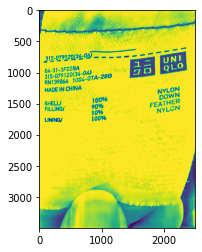

In [20]:
for label in labels:
    preprocessed = preprocessing_image(img)
    print(pytesseract.image_to_string(preprocessed,config=custom_config))
    plt.imshow(preprocessed)

In [21]:
import matplotlib.pyplot as plt 


In [22]:
#plot_image = Image.open('../raw_data/label_composition_images/IMG_1387.JPG')


i ; : Hil j
315-0791 2035 9D a ie its eae =
04-31-3F 028A
315-079 120(34-04) i
RN139864 1004-0TA-288
MADE IN CHINA
N
SHELL) 100% NYOWN
ee 10 cEATHER
LINING/ so NYLO™
er
4 =.



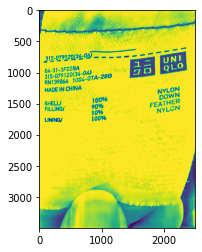

In [23]:
#plt.imshow(plot_image)
print(pytesseract.image_to_string(preprocessed,config=custom_config))
plt.imshow(preprocessed)

In [24]:
#original (no preprocessed)
print(pytesseract.image_to_string('../raw_data/label_composition_images/IMG_1387.jpg',config=custom_config))

PPAR ceiecssicee ats 2 bel Tt
Waal Seraiieycra not ©
trologitia! Sowders or $c:
Ory Psi stage Rinse
and hang © dey immedias
0% COTTON: GOTON



In [25]:
#img = cv2.imread('../raw_data/label_composition_images/IMG_1377.jpg')

#h, w, c = img.shape
#boxes = pytesseract.image_to_boxes(img) 
#for b in boxes.splitlines():
    #b = b.split(' ')
    #img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

#cv2.imshow('img', img)
#cv2.waitKey(0)